## Project 1 - Part 4

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This may include:

*   Histograms to view the distributions of various features in your dataset.
*   Boxplots to view statistical summaries of various features in your dataset.
*   Bonus: heatmaps of the correlation between features.

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 3/clean_sales_prediction.csv', index_col='Outlet_Identifier')
clean_df.head().T

Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non-Edible
Item_Visibility,0.0160473,0.0192782,0.0167601,0.0229105,0.0161643
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3
Outlet_Type,Supermarket Type1,Supermarket Type2,Supermarket Type1,Grocery Store,Supermarket Type1


Exploratory Data Analysis

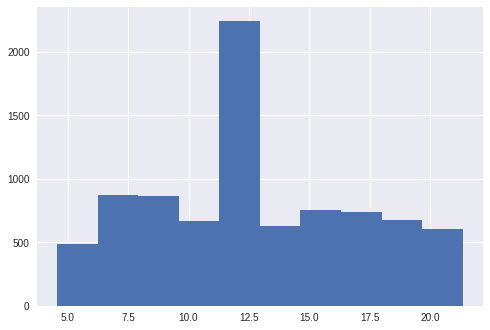

In [32]:
plt.style.use('seaborn')
clean_df.Item_Weight.hist();

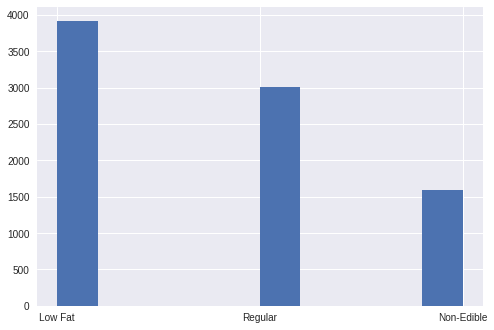

In [33]:
plt.style.use('seaborn')
clean_df.Item_Fat_Content.hist();

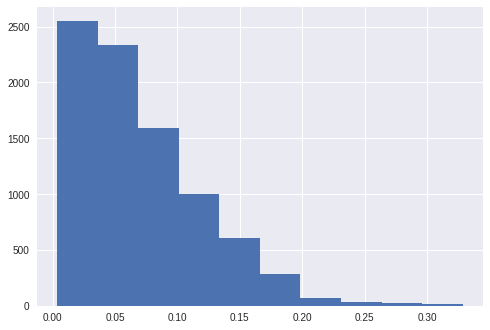

In [34]:
plt.style.use('seaborn')
clean_df.Item_Visibility.hist();

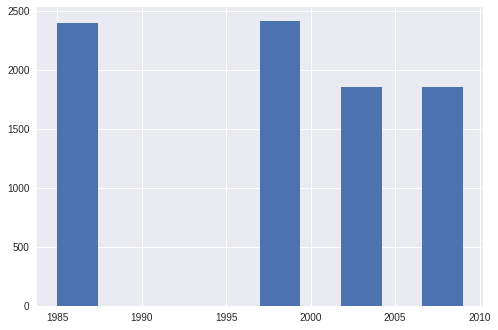

In [35]:
plt.style.use('seaborn')
clean_df.Outlet_Establishment_Year.hist();

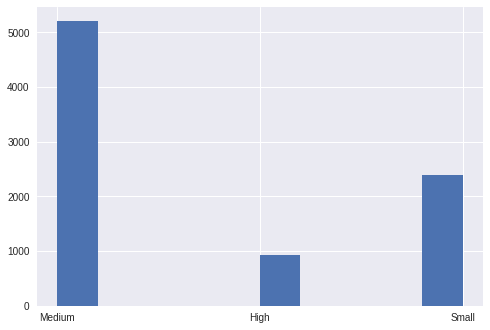

In [36]:
plt.style.use('seaborn')
clean_df.Outlet_Size.hist();

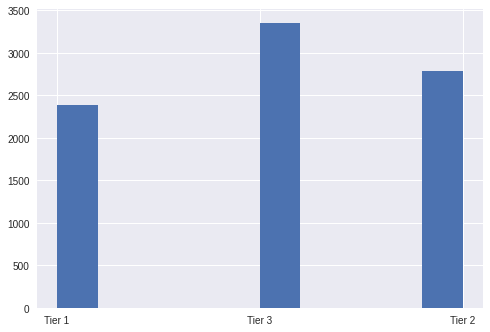

In [37]:
plt.style.use('seaborn')
clean_df.Outlet_Location_Type.hist();

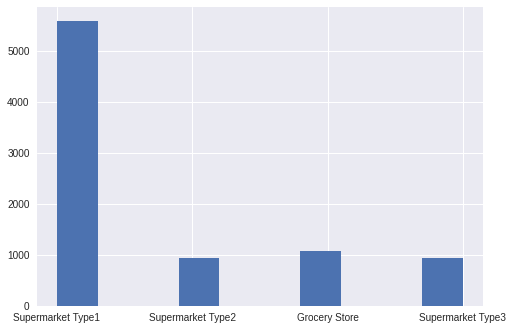

In [38]:
plt.style.use('seaborn')
clean_df.Outlet_Type.hist();

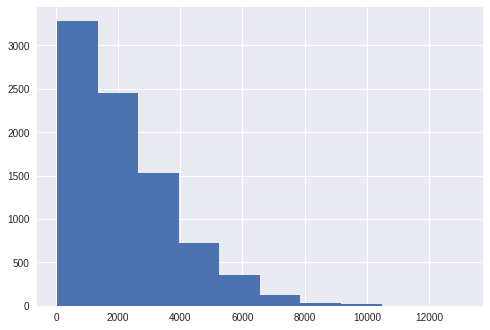

In [39]:
plt.style.use('seaborn')
clean_df.Item_Outlet_Sales.hist();

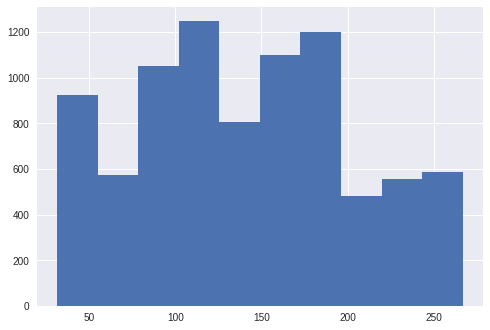

In [40]:
plt.style.use('seaborn')
clean_df.Item_MRP.hist();

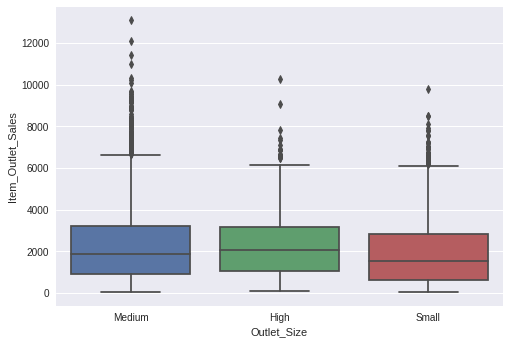

In [41]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=clean_df);

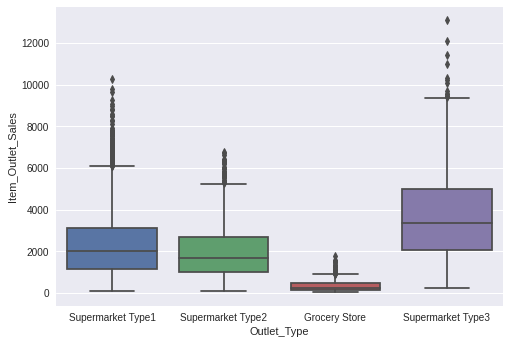

In [42]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=clean_df);

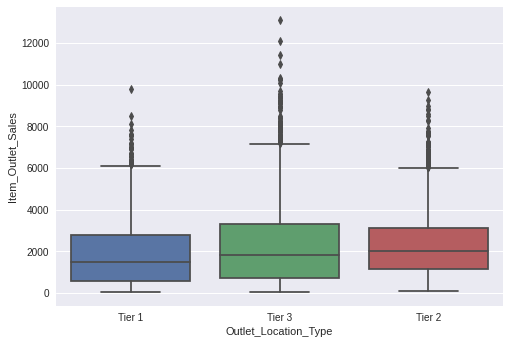

In [43]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=clean_df);

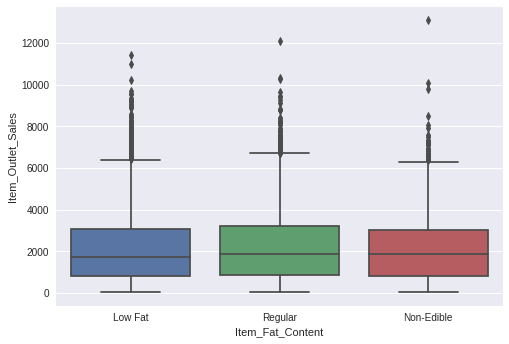

In [44]:
# Modify Item_Fat_Content to three categories
clean_df['Item_Fat_Content'] = clean_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Classify Non-Consumerable to Non-Edible in Item_Fat_Content #tidepods
clean_df.loc[clean_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
clean_df['Item_Fat_Content'].value_counts()
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=clean_df);

## Property Review

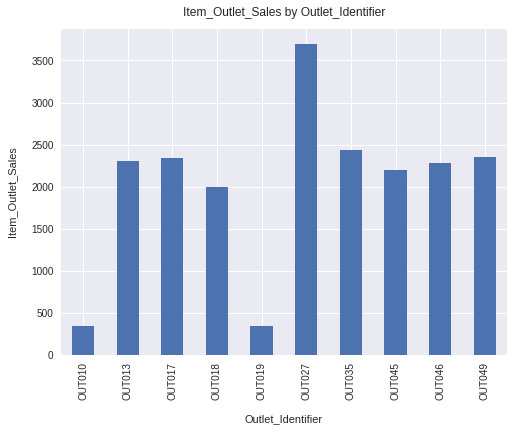

In [45]:
table1 = pd.pivot_table(clean_df,index=['Outlet_Identifier'],values=['Item_Outlet_Sales'])
table1
table1.plot(kind='bar',legend=None, figsize=(8, 6))
plt.xlabel('Outlet_Identifier', labelpad=14)
plt.ylabel('Item_Outlet_Sales', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Identifier', y=1.02);

plt.show();

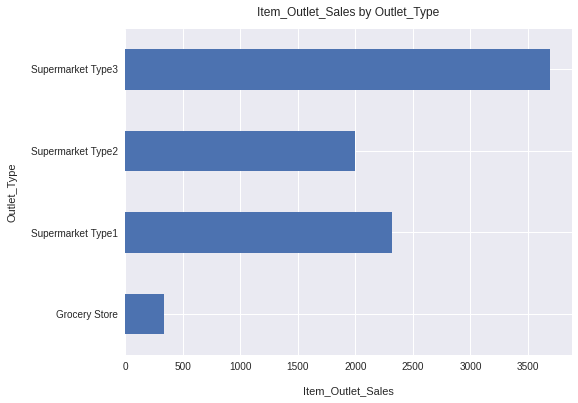

In [46]:
table2 = pd.pivot_table(clean_df,index=['Outlet_Type'],values=['Item_Outlet_Sales'])
table2
table2.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Type', y=1.02);

plt.show();

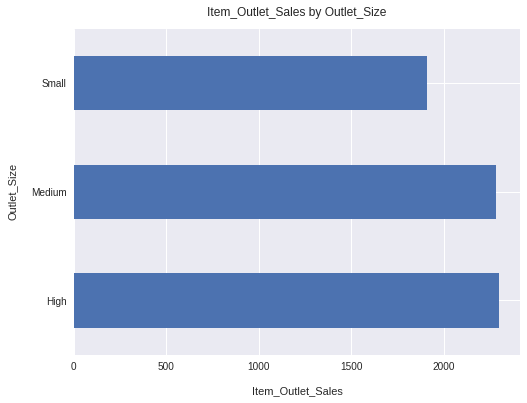

In [47]:
table3 = pd.pivot_table(clean_df,index=['Outlet_Size'],values=['Item_Outlet_Sales'])
table3
table3.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Size', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Size', y=1.02);

plt.show();

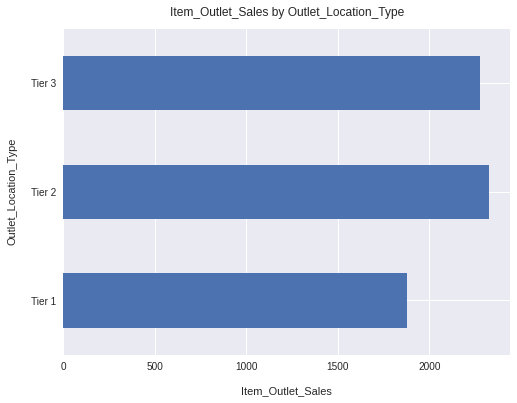

In [48]:
table4 = pd.pivot_table(clean_df,index=['Outlet_Location_Type'],values=['Item_Outlet_Sales'])
table4
table4.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Location_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Location_Type', y=1.02);

plt.show();

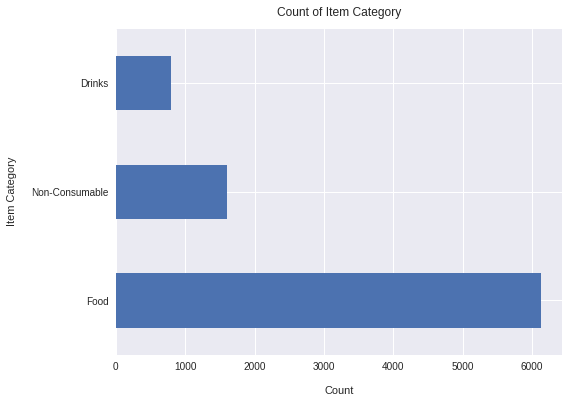

In [49]:
count_it = clean_df['Item_Category'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Item Category', labelpad=14)
plt.title('Count of Item Category', y=1.02);
plt.show()

## Product Review

In [50]:
# Modify Item_Fat_Content to three categories
clean_df['Item_Fat_Content'] = clean_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Classify Non-Consumerable to Non-Edible in Item_Fat_Content #tidepods
clean_df.loc[clean_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
clean_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

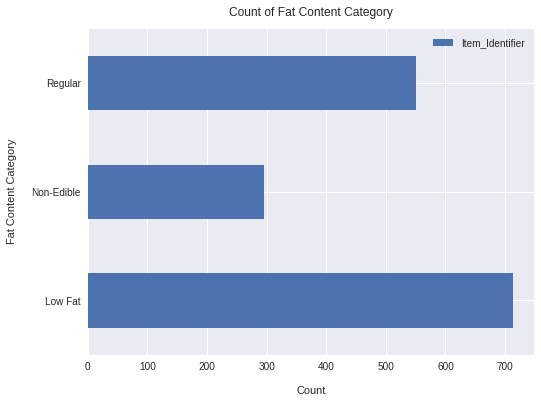

In [51]:
table1 = pd.pivot_table(clean_df,index=['Item_Fat_Content'],values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table1.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Fat Content Category', labelpad=14)
plt.title('Count of Fat Content Category', y=1.02);
plt.show();

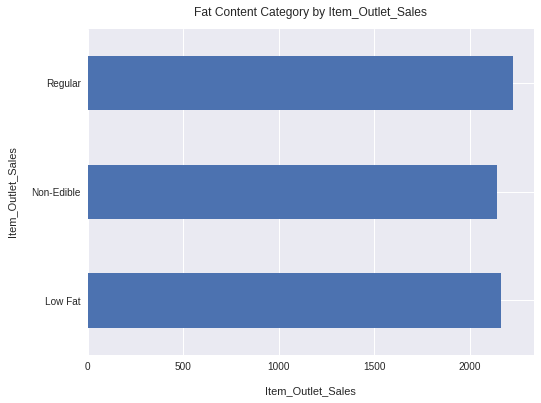

In [52]:
table1 = pd.pivot_table(clean_df,index=['Item_Fat_Content'],values=['Item_Outlet_Sales'])
table1.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Outlet_Sales', labelpad=14)
plt.title('Fat Content Category by Item_Outlet_Sales', y=1.02);
plt.show();

In [53]:
# get the first two characters of ID
clean_df['Item_Category'] = clean_df['Item_Identifier'].apply(lambda x: x[0:2])
# rename to new categories
clean_df['Item_Category'] = clean_df['Item_Category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
clean_df['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

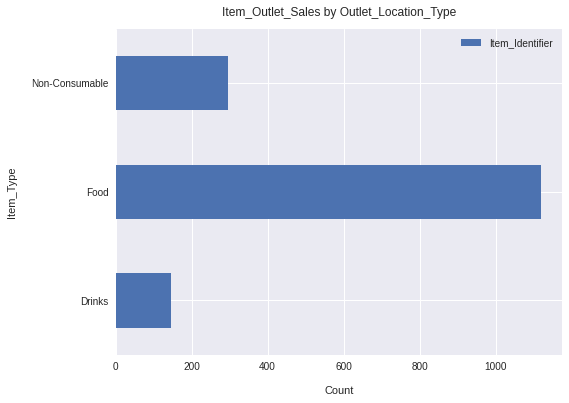

In [54]:
table2 = pd.pivot_table(clean_df,index=['Item_Category'],values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Item_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Location_Type', y=1.02);
plt.show();

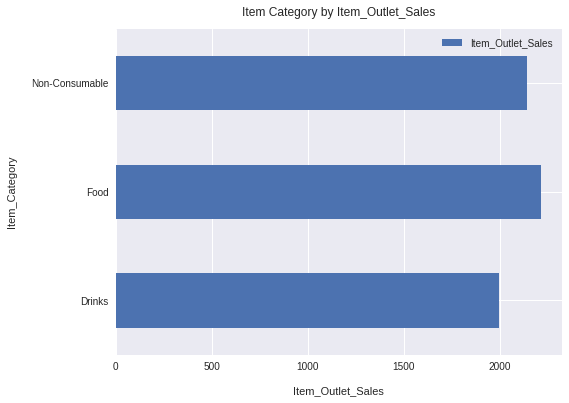

In [55]:
table2 = pd.pivot_table(clean_df,index=['Item_Category'],values=['Item_Outlet_Sales'])
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Category', labelpad=14)
plt.title('Item Category by Item_Outlet_Sales', y=1.02);
plt.show();

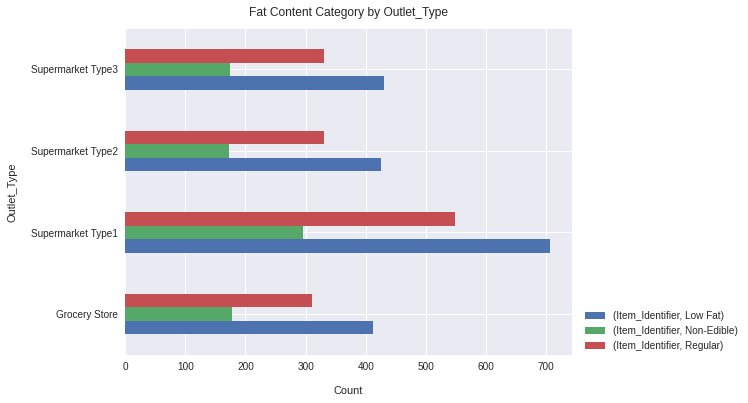

In [56]:
table2 = pd.pivot_table(clean_df,index=['Outlet_Type'],columns=['Item_Fat_Content'],
                        values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Outlet_Type', labelpad=14)
plt.title('Fat Content Category by Outlet_Type', y=1.02);
plt.legend(loc=(1.02,0))
plt.show();

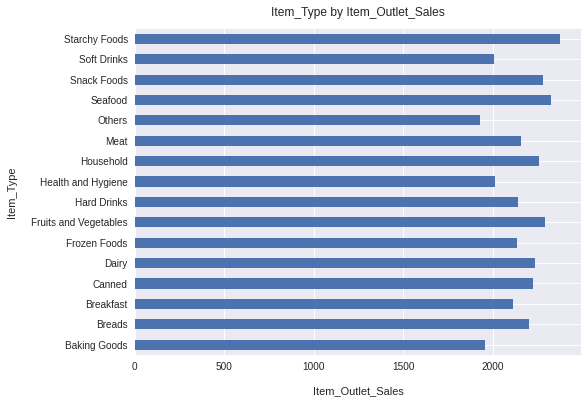

In [57]:
table6 = pd.pivot_table(clean_df,index=['Item_Type'],values=['Item_Outlet_Sales'])
table6
table6.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Type', labelpad=14)
plt.title('Item_Type by Item_Outlet_Sales', y=1.02);

plt.show();